In [35]:
import numpy as np
from numpy.linalg import norm
from scipy.stats import multivariate_normal as MVN
from numpy import sqrt, zeros, eye, exp, log
from Manifolds.GeneralizedEllipse import GeneralizedEllipse
import matplotlib.pyplot as plt
from utils import prep_contour

In [162]:
# PRIOR
def logprior(xi):
    return log(0.5 * MVN(np.array([-1, 0]), 0.5*eye(2)).pdf(xi) + 0.5 * MVN(np.array([1, 0]), 0.5*eye(2)).pdf(xi))


# EPANECHNIKOV KERNEL
def log_epa_kernel_broadcast(xi_matrix, epsilon, target, z0):
    u_vector = sqrt((target.logpdf(xi_matrix) - z0)**2)
    with np.errstate(divide='ignore'):
        return log((3*(1 - (u_vector**2 / (epsilon**2))) / (4*epsilon)) * (u_vector <= epsilon).astype('float'))

# UNIFORM KERNEL
def log_uni_kernel_broadcast(xi_matrix, epsilon, target, z0):
    with np.errstate(divide='ignore'):
        return log((abs(target.logpdf(xi_matrix) - z0) <= epsilon).astype('float64'))
    
# GAUSSIAN KERNEL
def log_gau_kernel_broadcast(xi_matrix, epsilon, target, z0):
    return -log(sqrt(2*np.pi)*epsilon) -0.5*((target.logpdf(xi_matrix) - z0) / epsilon)**2

In [219]:
mu_target = zeros(2)
Sigma_target = np.array([[1.0, 0.3], [0.3, 1.0]])
target = MVN(mu_target, Sigma_target)
epsilon = 0.5 #0.5
z0 = -2.9513586307684885

In [220]:
ellipse = GeneralizedEllipse(mu_target, Sigma_target, exp(z0))

In [221]:
def log_post_epa(xi):
    return logprior(xi) + log_epa_kernel_broadcast(xi, epsilon, target, z0)

def log_post_uni(xi):
    return logprior(xi) + log_uni_kernel_broadcast(xi, epsilon, target, z0)

def log_post_gau(xi):
    return logprior(xi) + log_gau_kernel_broadcast(xi, epsilon, target, z0)

In [222]:
logpost_contours_epa  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_epa)
logpost_contours_uni  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_uni)
logpost_contours_gau  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_gau)
logprior_contours = prep_contour([-2, 2], [-2, 2], 0.01, logprior)
manifold = prep_contour([-2, 2], [-2, 2], 0.01, target.logpdf)

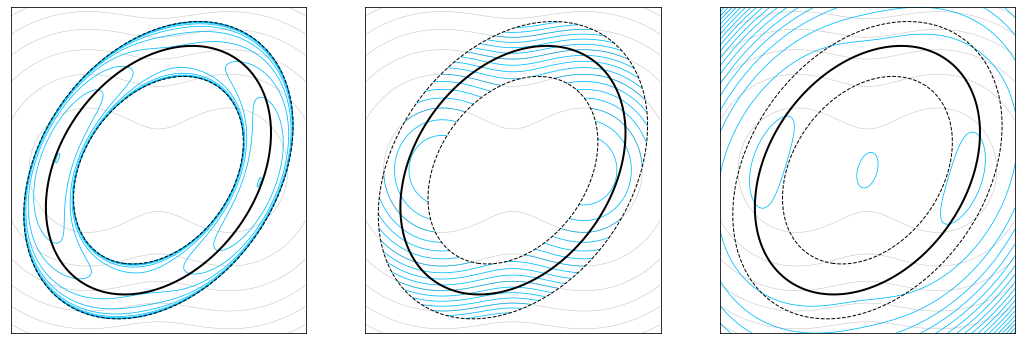

In [224]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
### epanechnikov kernel
ax[0].contour(*logpost_contours_epa, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[0].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[0].contour(*manifold, levels=[z0], linewidths=2.0, colors=['black'], linestyles='solid')
ax[0].contour(*manifold, levels=[z0-epsilon, z0+epsilon], linestyles='--', colors='black', linewidths=1.0)
ax[0].set_xticks([])
ax[0].set_yticks([])

### uniform kernel
ax[1].contour(*logpost_contours_uni, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[1].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[1].contour(*manifold, levels=[z0], linewidths=2.0, colors=['black'], linestyles='solid')
ax[1].contour(*manifold, levels=[z0-epsilon, z0+epsilon], linestyles='--', colors='black', linewidths=1.0)
ax[1].set_xticks([])
ax[1].set_yticks([])

### gaussian kernel
ax[2].contour(*logpost_contours_gau, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[2].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[2].contour(*manifold, levels=[z0], linewidths=2.0, colors=['black'], linestyles='solid')
ax[2].contour(*manifold, levels=[z0-epsilon, z0+epsilon], linestyles='--', colors='black', linewidths=1.0)
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.savefig("figures/contours_filamentary.png", dpi=500)
plt.show()

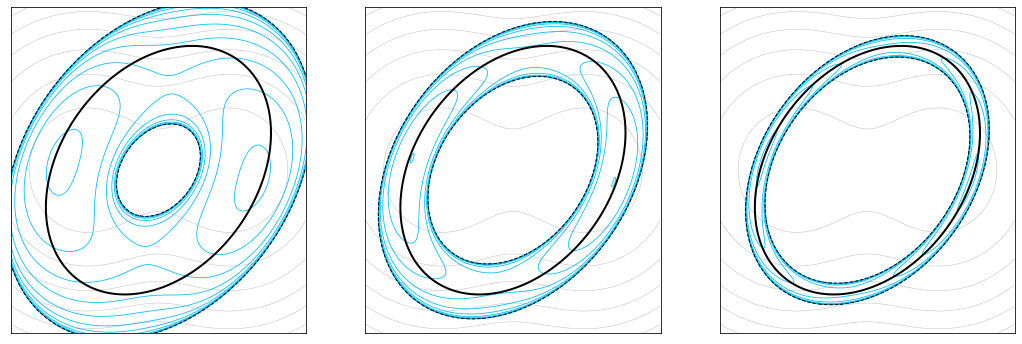

In [228]:

z01 = -2.9513586307684885
z02 = -2.9513586307684885
z03 = -2.9513586307684885

epsilon1 = 1.0
epsilon2 = 0.5
epsilon3 = 0.2

log_post_epa1 = lambda xi: logprior(xi) + log_epa_kernel_broadcast(xi, epsilon1, target, z01)
log_post_epa2 = lambda xi: logprior(xi) + log_epa_kernel_broadcast(xi, epsilon2, target, z02)
log_post_epa3 = lambda xi: logprior(xi) + log_epa_kernel_broadcast(xi, epsilon3, target, z03)


logpost_contours_epa1  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_epa1)
logpost_contours_epa2  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_epa2)
logpost_contours_epa3  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_epa3)

logprior_contours = prep_contour([-2, 2], [-2, 2], 0.01, logprior)
manifold = prep_contour([-2, 2], [-2, 2], 0.01, target.logpdf)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
### epanechnikov kernel
ax[0].contour(*logpost_contours_epa1, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[0].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[0].contour(*manifold, levels=[z01], linewidths=2.0, colors=['black'], linestyles='solid')
ax[0].contour(*manifold, levels=[z01-epsilon1, z01+epsilon1], linestyles='--', colors='black', linewidths=1.0)
ax[0].set_xticks([])
ax[0].set_yticks([])

### uniform kernel
ax[1].contour(*logpost_contours_epa2, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[1].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[1].contour(*manifold, levels=[z02], linewidths=2.0, colors=['black'], linestyles='solid')
ax[1].contour(*manifold, levels=[z02-epsilon2, z02+epsilon2], linestyles='--', colors='black', linewidths=1.0)
ax[1].set_xticks([])
ax[1].set_yticks([])

### gaussian kernel
ax[2].contour(*logpost_contours_epa3, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[2].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[2].contour(*manifold, levels=[z03], linewidths=2.0, colors=['black'], linestyles='solid')
ax[2].contour(*manifold, levels=[z03-epsilon3, z03+epsilon3], linestyles='--', colors='black', linewidths=1.0)
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.savefig("figures/contours_filamentary_epsilon.png")
plt.show()